In [1]:
import os
import pdb
import ntpath
import functools
import numpy as np
import scipy as sp
from scipy.stats import pearsonr
from scipy.sparse.linalg import svds
from scipy.spatial.distance import cdist, pdist, squareform
import matplotlib as mpl
import matplotlib.pylab as plt
import FileDialog  # for creating binary
from Tkinter import Tk
import tkFileDialog
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, KMeans
from sklearn.neighbors import kneighbors_graph
import librosa
import djitw
from feature_extraction import extractFeature
from statistics import lpf, findElbow
from sklearn.metrics import silhouette_score
import peakutils
from seasonal import fit_trend
%matplotlib inline

In [34]:
data = np.zeros((256, 16))
data[::10, :] = 1
data2 = np.tile(np.diag(np.ones((16,), dtype=int)), 5).T

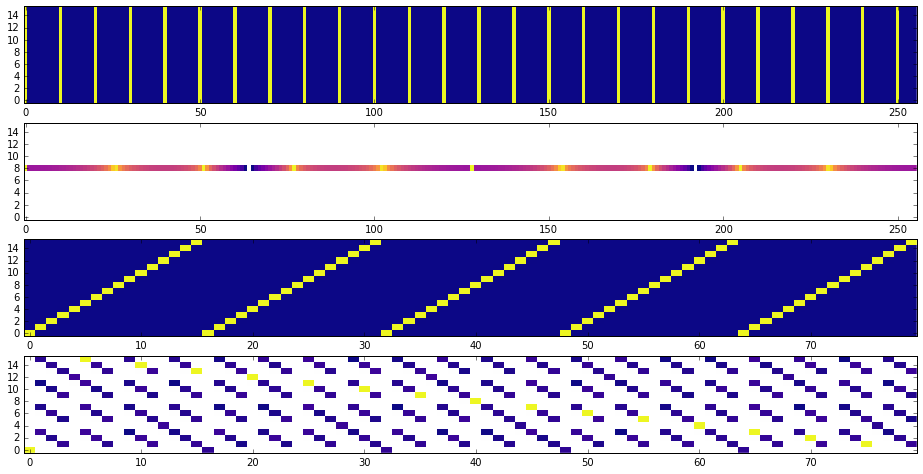

In [35]:
fig, axes = plt.subplots(4, 1, figsize=(16, 8))
axes[0].imshow(data.T,
               interpolation='none',
               origin='low',
               aspect='auto',
               cmap=plt.cm.plasma)
axes[1].imshow(np.log(np.fft.fftshift(np.abs(np.fft.fft2(data)**2))).T,
               interpolation='none',
               origin='low',
               aspect='auto',
               cmap=plt.cm.plasma)
axes[2].imshow(data2.T,
               interpolation='none',
               origin='low',
               aspect='auto',
               cmap=plt.cm.plasma)

axes[3].imshow(np.log(np.fft.fftshift(np.abs(np.fft.fft2(data2)**2))).T,
               interpolation='none',
               origin='low',
               aspect='auto',
               cmap=plt.cm.plasma)


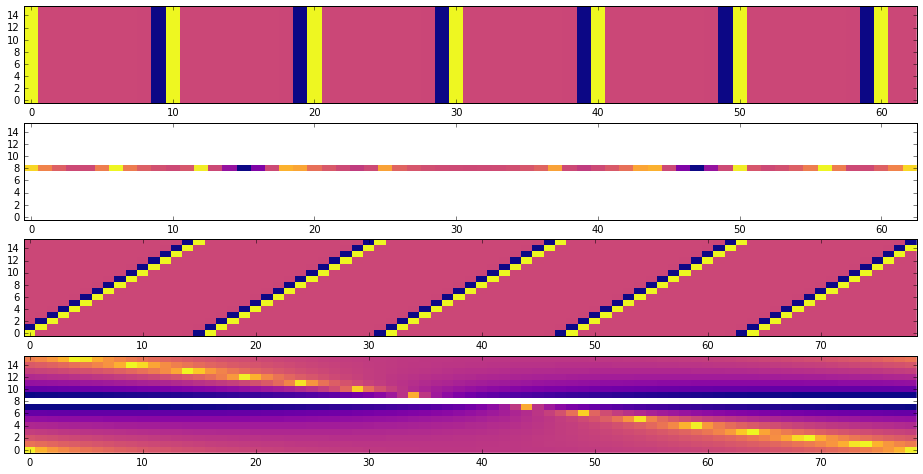

In [23]:
fig, axes = plt.subplots(4, 1, figsize=(16, 8))
axes[0].imshow((data[:-1] - data[1:]).T,
               interpolation='none',
               origin='low',
               aspect='auto',
               cmap=plt.cm.plasma)
axes[1].imshow(np.log(np.fft.fftshift(np.abs(np.fft.fft2((data[:-1] - data[1:]))**2))).T,
               interpolation='none',
               origin='low',
               aspect='auto',
               cmap=plt.cm.plasma)
axes[2].imshow((data2[:-1] - data2[1:]).T,
               interpolation='none',
               origin='low',
               aspect='auto',
               cmap=plt.cm.plasma)

axes[3].imshow(np.log(np.fft.fftshift(np.abs(np.fft.fft2((data2[:-1] - data2[1:]))**2))).T,
               interpolation='none',
               origin='low',
               aspect='auto',
               cmap=plt.cm.plasma)
